# Chapter 10 - Working with Data

This is looking at the art of working with data. Ooooooo.

Data exploration is the first step. Get in there and dig around. No wrong answers. Before you start answering questions with your data you really need to get in and understand it. 

In [56]:
# Need to bring in some other functions from previous chapters and I didn't make a package out of them. Someday I might.
import math

def shape(matrix):
    num_rows = len(matrix)
    num_cols = len(matrix[0]) if matrix else 0
    
    return num_rows, num_cols

def get_col(A, j):
    return [A_i[j]
           for A_i in A]

def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    return sum(v_i * w_i
              for v_i, w_i in zip(v,w))

def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def sum_of_squares(v):
    return dot(v,v)

def std_deviation(x):
    return math.sqrt(variance(x))

def variance(x):
    n=len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    # check if the cdf is standard
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0 # very close to zero
    hi_z = 10.0 # very close to one
    def peter_thiel(x):
        if x == 0:
            return 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        elif mid_p > p:
            hi_z = mid_z
        else:
            break
            
    return mid_z

def normal_cdf(x, mu=0, sigma =1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def correlation(x,y):
    stdev_x = std_deviation(x)
    stdev_y = std_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0 # if there's no variation then the correlation is zero

In [33]:
# After summary statistics, exploring one-dimensional data through a histogram is probably the next step. 

def bucketize(point, bucket_size):
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()


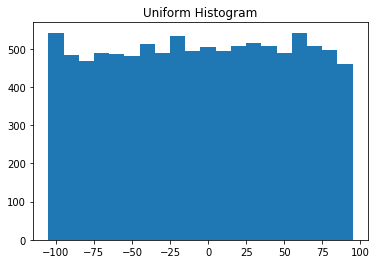

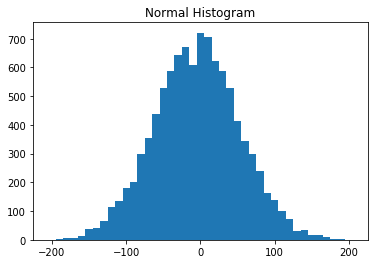

In [34]:
# Create some random data
import random
from collections import Counter
import matplotlib.pyplot as plt
random.seed(0)

uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

# very different distributions with similar mean and stdev

plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")
%matplotlib inline 
# I always forget the magic

Both histograms had pretty different max and mins but just knolwing that isn't enough to know how they differed or what the overall structure of the data looks. 

## Now on to two-dimensional data

Text(0.5,1,'Very Different Joint Distributions')

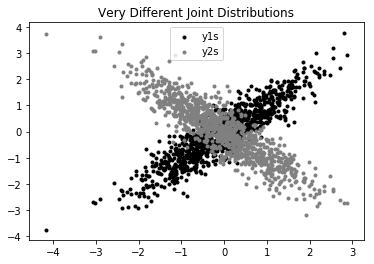

In [35]:
# make some more fake data

def random_normal():
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
y1s = [ x + random_normal() / 2 for x in xs]
y2s = [-x + random_normal() / 2 for x in xs]

# Histograms look about the same, but if we plot the scatter it shows the differences
plt.scatter(xs, y1s, marker='.', color='black', label='y1s')
plt.scatter(xs, y2s, marker='.', color='gray', label='y2s')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")

In [43]:
# difference is also apparent when we look at correlations
print(correlation(xs, y1s))
print(correlation(xs, y2s))

0.9010493686379609
-0.8920981526880033


## Many dimensional data

Correlation matrix, scatter plots, etc

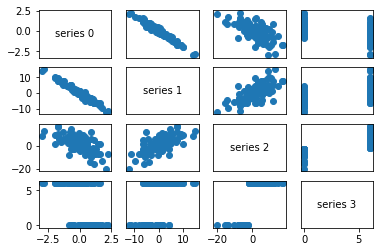

In [59]:
# correlation between the ith and jth dimension of the data
def correlation_matrix(data):
    _, num_columns = shape(data)
    
    def matrix_entry(i,j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

# or make a scatter plot matrix showing all pairwise scatter plots
def make_scatterplot_matrix():
    # generate data
     
    num_points = 100
    
    def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
    random.seed(0)
    data = [random_row() for _ in range(num_points)]

    # plot it
    _, num_columns = shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):
            if i != j: 
                ax[i][j].scatter(get_col(data, j), get_col(data, i))

            else:
                ax[i][j].annotate("series " + str(i), (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')

            if i < num_columns -1:
                ax[i][j].xaxis.set_visible(False)

            if j > 0: 
                ax[i][j].yaxis.set_visible(False)

    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())
    plt.show()
    
make_scatterplot_matrix()



## Cleaning and Munging

The real world is hella messy. Typing data, parsing it, etc takes a fair amount of work and can be done elegantly (or not). 

In [ ]:
# parser functions